In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
# reading the data from csv
df = pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
#converting the data to array for plotting. 
X = np.array(df.iloc[:,3:5])
y = np.array(df['Type'])
print("Shape of X:"+str(X.shape))
print("Shape of y:"+str(y.shape))

Shape of X:(214, 2)
Shape of y:(214,)


In [5]:
# custome color maps
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93'])

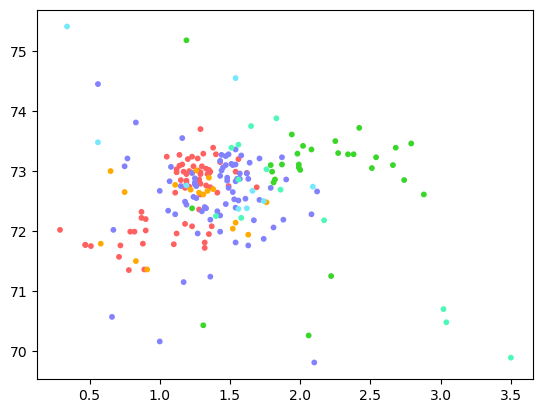

In [6]:
# Create color maps
plt.scatter(X[:,0],X[:,1],c=y,cmap=cm_dark,s=10,label=y)
plt.show()

C:\Users\MP25B\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\MP25B\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\MP25B\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\MP25B\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\MP25B\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 60.0% of the points

<Axes: xlabel='Na', ylabel='RI'>

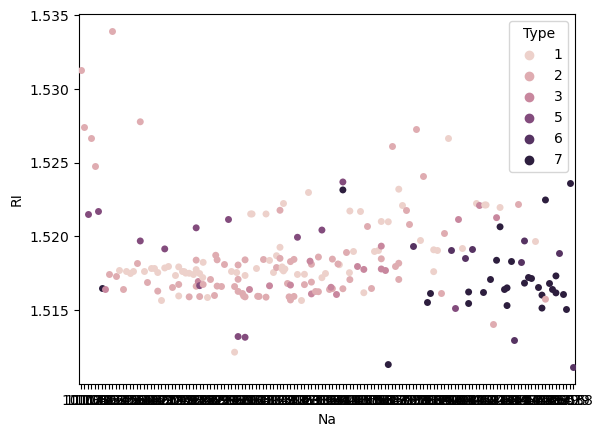

In [7]:
# Try plots using seaborn
sns.swarmplot(x='Na',y='RI',data=df,hue='Type')

In [8]:
# creating training set, test set and checking shapes 
X_train,X_test,Y_train,Y_test = train_test_split(X,y)
print("Shape of X_Train:"+str(X_train.shape))
print("Shape of y_Train:"+str(Y_train.shape))
print("Shape of X_Test:"+str(X_test.shape))
print("Shape of y_Test:"+str(Y_test.shape))

Shape of X_Train:(160, 2)
Shape of y_Train:(160,)
Shape of X_Test:(54, 2)
Shape of y_Test:(54,)


In [9]:
# Using KNN to classify the glasses 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
# Predicting results using KNN fit. 
pred = knn.predict(X_train)
pred

array([1, 2, 2, 3, 1, 1, 7, 1, 2, 2, 2, 2, 2, 2, 2, 1, 5, 1, 3, 2, 1, 1,
       1, 7, 2, 7, 2, 2, 5, 1, 1, 2, 7, 2, 1, 2, 1, 1, 5, 7, 2, 2, 2, 2,
       7, 1, 1, 1, 1, 2, 7, 7, 1, 2, 1, 1, 2, 1, 3, 1, 7, 6, 1, 2, 1, 2,
       2, 5, 7, 2, 2, 2, 1, 7, 1, 3, 6, 2, 7, 1, 5, 2, 1, 1, 1, 2, 1, 1,
       1, 7, 1, 6, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 7, 2, 1, 2, 1, 1, 2, 1,
       2, 1, 1, 7, 2, 2, 1, 7, 2, 5, 2, 3, 1, 1, 1, 1, 7, 2, 2, 7, 1, 2,
       7, 1, 1, 1, 1, 2, 2, 5, 1, 6, 2, 7, 1, 1, 1, 7, 7, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 2, 3], dtype=int64)

In [11]:
# Check accuracy
accuracy = knn.score(X_train,Y_train)
print("The accuracy is :"+str(accuracy))

The accuracy is :0.75625


[[47  5  0  0  0  0]
 [11 40  1  0  1  1]
 [ 5  2  5  0  0  0]
 [ 1  3  0  6  0  0]
 [ 2  3  0  1  2  0]
 [ 1  1  0  0  1 21]]


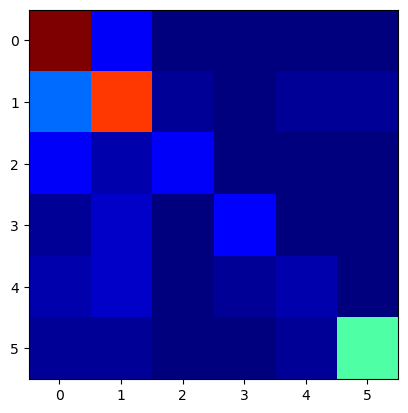

In [12]:
#computing confusion matrix 
cnf_matrix = confusion_matrix(Y_train,pred)
print(cnf_matrix)

#plotting the matrix in with plotly
plt.imshow(cnf_matrix,cmap=plt.cm.jet)

<Axes: >

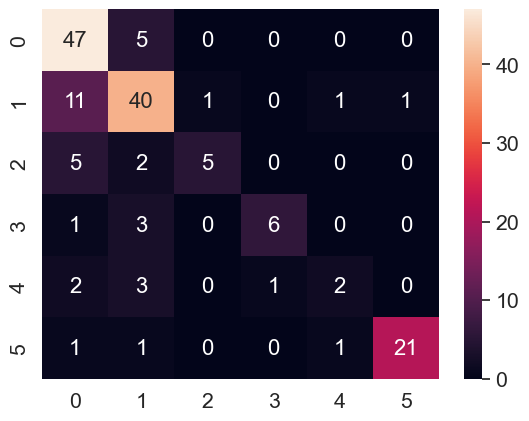

In [13]:
#visualizing the confusion matrix
df_cm = pd.DataFrame(cnf_matrix, range(6),range(6))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

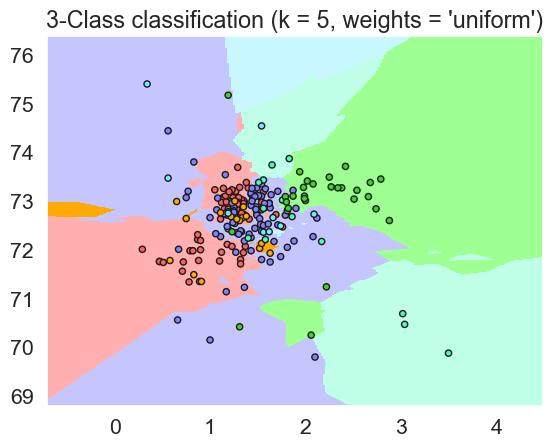

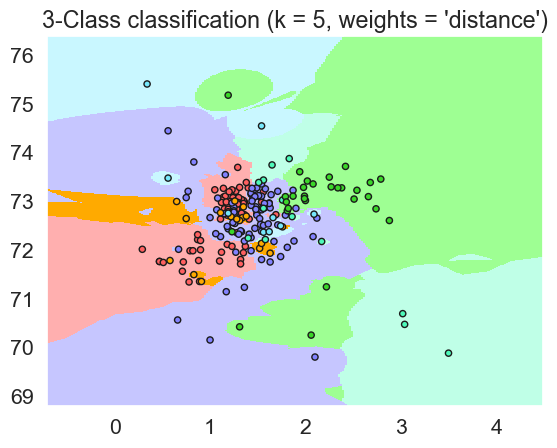

In [14]:
# plotting the decision boundries for the data 

h = .02  # step size in the mesh
n_neighbors = 5 # No of neighbours
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])   # ravel to flatten the into 1D and c_ to concatenate 

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cm_bright)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_dark,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"% (n_neighbors, weights))

plt.show()